# Importing modules

In [2]:
#Importing various modules required in the model creation and graphing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sb

# Importing raw data

In [3]:
#Reading the csv into a dataframe
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)
print(df.head(10))
print("\n")
#Observing statistical values
print("\n***************************\n")
print(df.describe())
print("\n***************************\n")

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25



***************************

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

***************************



In [4]:
'''
iloc for reading hours(independent) and scores(dependent) variables into arrays
Reading data into X and Y variables.
Now the array is of 2 dimension as the scikitlearn expects the array with a 2 dimension
'''
X=df.iloc[:,:-1].values
Y=df.iloc[:,1].values

# Assumptions of a SLR model

In [5]:
'''
Before selecting SLR model, we need to check for assumptions
**********************************
Assumption 1 of Simple Linear Regression
1. The 2 variables X and Y need to be continous numeric, NOT categorical.
**********************************
'''
# By Inspecting the 2 variables X and Y, both are continous and Numeric
# Assumption 1 PASS
print("Assumption 1 is a pass")

'''
**********************************
Assumption 2 of Simple Linear Regression
2. Data is free of Missing values,
if missing values are there MVT(Missing Value Treatment) need to be performed.

Below user-defined function checks for the missing values

**********************************
'''
def missing_counter(Y):
    if np.count_nonzero(~np.isnan(Y))==len(Y):
        print ("No missing values")
    else:
        print("Missing value count is",len(Y)-np.count_nonzero(~np.isnan(Y)), "out of" ,len(Y))
    
missing_counter(Y)
missing_counter(X)

# Assumption 2 PASS
print("Assumption 2 is a pass")

Assumption 1 is a pass
No missing values
No missing values
Assumption 2 is a pass


In [6]:
'''
**********************************
Assumption 3 of Simple Linear Regression
3. Data is free of outliers.
If the value of -1.96 < z < 1.96 there are no outliers

**********************************
'''
#np.abs is required as the z scores are negative as well
z = max(np.abs(stats.zscore(Y)))
print(z)

# Assumption 3 PASS
print("Assumption 3 is a pass")

1.756539409843663
Assumption 3 is a pass


Correlation Coefficient : 
 [[1.         0.97619066]
 [0.97619066 1.        ]]
Covariance :            Hours      Scores
Hours    6.3761   62.331500
Scores  62.3315  639.426667
Assumption 4 is a pass


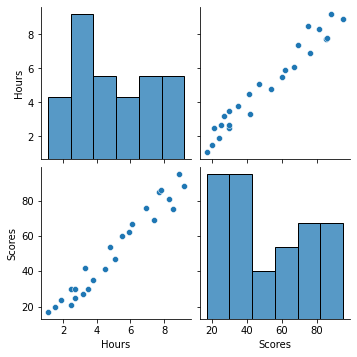

In [13]:
'''
**********************************
Assumption 4 of Simple Linear Regression
4. Linear relationship between X and Y
Correlation and covariabce would give the direction and the idea about linearity
**********************************
'''
x=df['Hours'].values
y=df['Scores'].values
print("Correlation Coefficient : \n", np.corrcoef(x,y))
print("Covariance : ", df.cov())
sb.pairplot(df)
# Assumption 4 PASS as the relationship seems to be strongly linear and corr and cov are positive
print("Assumption 4 is a pass")

In [8]:
'''
**********************************
Assumption/suggestion 5 of Simple Linear Regression
5. Depending on the case/business need, data should be split into TRAIN and TEST
**********************************
'''
# Assumption 5 PASS and we are splitting data, as per the problem
print("Assumption/suggestion 5 is a pass")

Assumption/suggestion 5 is a pass


# Creating SLR Model

In [9]:
'''
***************************************************************************************
***************************************************************************************
***************************************************************************************
Carrying on with Simple Linear Regression
***************************************************************************************
***************************************************************************************
***************************************************************************************
'''
#splitting data into training and test sets
#Note that it would need 4 parameters in the same train and test sequence
#train_test_split is a function in the model_selection module
#X and Y are the arrays that we created above using iloc
#test_size=1/3 so train_size=2/3 as per usual norm
#random_state=0 is the seed value for replicating the results, we hardcode it for replicating the results
#The train and test would now have random values, this removes any data bias and let go of data inbuilt patterns

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state=0)

In [10]:
#we import the LinearRegression class
#reg is simply a linear regressor object and LinearRegression is a class, reg is an instance of class 
#fit is a method available in LinearRegression class, this now creates a best line fit based on X and Y
#At this point the machine learning model is ready and the best fit line is in place
#this reg object can now be called with predict method for predicting value of an array or single value
#You cannot call the predict method if the object reg is not trained using the fit method
#Y_predict are the predicted scores and Y_test are actuals, you can compare them to see the model's performance
#creating y_predict to match with Y_test, y_predict is created with X_test 
#In summary we are trying to predict y with test x and match against test y for the accuracy of the model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)
Y_predict=reg.predict(X_test)

In [11]:
''''
We can use the attributes associates to the reg object and can print to get many values
Equation of a simple liner regression line is : y=ax+b
where,
a is the coefficient of x or slope
b is the y intercept
'''
print(reg.coef_) #Nothing but the coeffecient of X or the SLOPE
print(reg.intercept_) # Nothing but the y intercept
#Equation now becomes : 9.69x+2.50 = y
#This can be used for predicting y values (scores) manually by putting value of x (hours)

[9.69062469]
2.5069547569547623


# Predicting Value by model created

In [12]:
#We are now trying to forecast, as per question what would be the score if the student studies for 9.25hrs/day
# predict is a method in LinearRegression class that helps in prediction based on trained model
#we are passing satic value of 9.25hrs/day

Y_predict_val=reg.predict(np.array(9.25).reshape(1,1))
print(Y_predict_val)
print("\nIf a student studies for 9.25hrs, he is predicted to score 92.14\n")

#Equation of SLR model : 9.69x+2.50 = y
#Checking value manually : 9.69 * (9.25) +2.50 = 92.1325
#This value is very close to the value predicted by the model (92.145)

[92.14523315]

If a student studies for 9.25hrs, he is predicted to score 92.14



# Visualizing test and train data

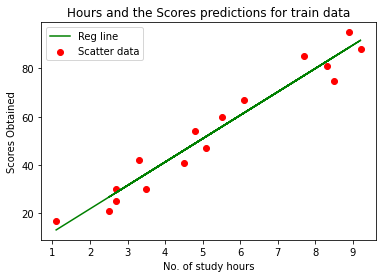

In [14]:
#Implement the scatter line graph with X and Y train data
#Plotting the regression line with X and predicted Y on X train
#Basically creating line for X_train and predicted values from training data frame
# scatter is a function from plt
#in plt.plot the x is X_train and Y is predicted values of X_train or this is our y(hat), Y_train are the observed points
plt.scatter(X_train,Y_train,color='red',label="Scatter data")
plt.plot(X_train,reg.predict(X_train),c='green',label="Reg line")
#Giving title to the plot for making it look better, also giving labels to X and Y axis
plt.title('Hours and the Scores predictions for train data')
plt.xlabel('No. of study hours')
plt.ylabel('Scores Obtained')
plt.legend()
plt.show()  

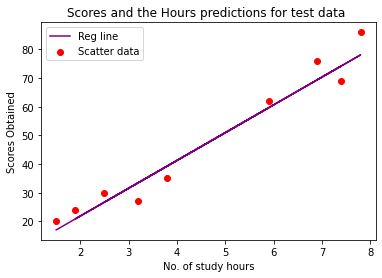

In [15]:
#Creating the plot for test data, very similar to the above graph
# we wish to keep the regression line as same, as this is the model line
plt.scatter(X_test,Y_test,color='red',label="Scatter data")
plt.plot(X_test,reg.predict(X_test),c='purple',label="Reg line")
#Giving title to the plot for making it look better, also giving labels to X and Y axis
plt.title('Scores and the Hours predictions for test data ')
plt.xlabel('No. of study hours')
plt.ylabel('Scores Obtained')
plt.legend()
plt.show()  

# Checking accuracy of the model

In [16]:
#Model Evaluation
'''
There are three primary metrics used to evaluate linear models. 
These are: Mean absolute error (MAE), Mean squared error (MSE), or Root mean squared error (RMSE).
1. MAE: The easiest to understand. Represents average error
2. MSE: Similar to MAE but noise is exaggerated and larger errors are “punished”. 
It is harder to interpret than MAE as it’s not in base units, however, it is generally more popular.
3. RMSE: Most popular metric, similar to MSE, however, the result is square rooted 
to make it more interpretable as it’s in base units. It is recommended that RMSE 
be used as the primary metric to interpret your model.
4. R2 or R square (value lies between 0-1 or 0%-100%). The larger the value, better the model prediction
*******************************************************************************************
Below, we calculate each metric. 
All of them require two lists as parameters, with one being our 
predicted values and the other being the test or true or actual values in the data
'''
from sklearn import metrics

#1. Result for MAE (Mean Absolute Error) >> The formula is avg(|y-yhat|)
print("MAE : ",metrics.mean_absolute_error(Y_test,Y_predict))

#2. Result for MSE (Mean Squared Error) >> The formula is avg(|(y-yhat)**2|)
print("MSE : ",metrics.mean_squared_error(Y_test,Y_predict))

#3. Let's calculate the RMSE from scartch, RMSE is also a measure of the goodness of fit of a model.
#The model is predicting scores to a good extent
rss=((Y_test-Y_predict)**2).sum() #residual sum of squares or the SSE (Sum squared errors)..just like Variance
mse=np.mean((Y_test-Y_predict)**2) #mean square error just like the standdard deviation or sigma
print(f"Final rmse value is : {np.sqrt(mse)}")

#3.1 Another way for RMSE, check from above calculation, the values match
print("RMSE (another way) : ",np.sqrt(metrics.mean_squared_error(Y_test,Y_predict)))

#4. Calculating the R square and printing it for the goodness of fit, it comes out to be 95.01%
#The variation that can be explained by this model is 95.01%
#reg is the LinearRegression() object
r2_score=reg.score(X_train,Y_train)
print("R-square value : ",r2_score) 

MAE :  4.691397441397438
MSE :  25.463280738222547
Final rmse value is : 5.046115410711743
RMSE (another way) :  5.046115410711743
R-square value :  0.9501107277744313
